In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_hedonic = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')

data_utilitarian = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

## Functions for helpfulness analysis 

In [48]:
# Function Building for analyzing the helpful votes by product type

def plot_votes_by_product_type(data):
    # Get unique product types
    product_types = data['product'].unique()

    # Initialize lists to store counts
    not_helpful_votes_counts = []
    helpful_votes_counts = []

    # Calculate counts for each product type
    for product_type in product_types:
        # Count of rows where helpful votes are zero for the current product type
        not_helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)

        # Count of rows where helpful votes are greater than zero for the current product type
        helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)

    # Create stacked bar chart
    plt.figure(figsize=(12, 6))

    # Plotting the stacked bar chart
    index = range(len(product_types))
    bar_width = 0.3

    plt.bar(index, not_helpful_votes_counts, bar_width, color='red', label='Not Helpful Votes')
    plt.bar([i + bar_width for i in index], helpful_votes_counts, bar_width, color='blue', label='Helpful Votes')

    # Adding counts on top of each bar for not helpful votes
    for i, count in enumerate(not_helpful_votes_counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom', color='black')

    # Adding counts on top of each bar for helpful votes
    for i, count in enumerate(helpful_votes_counts):
        plt.text(i + bar_width, count + 0.1, str(count), ha='center', va='bottom', color='black')

    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.title('Not Helpful Votes vs Helpful Votes by Product Type')
    plt.xticks([i + bar_width/4 for i in index], product_types)
    plt.legend()

    # Display the plot
    plt.show()

In [50]:
#Function for calculating the review counts by product type/helpful votes 
def calculate_review_counts(data, category_column='product'):
    # Get unique categories
    categories = data[category_column].unique()

    # Initialize lists to store counts and categories
    categories_list = []
    not_helpful_votes_counts = []
    helpful_votes_counts = []
    total_reviews_counts = []

    # Calculate counts for each category
    for category in categories:
        # Check if the category exists in the DataFrame
        if category not in data[category_column].values:
            print(f"Category '{category}' not found in the DataFrame.")
            continue
        
        # Count of rows where helpful votes are zero for the current category
        not_helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)
        
        # Count of rows where helpful votes are greater than zero for the current category
        helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)
        
        # Append category to the list for DataFrame creation
        categories_list.append(category)

        # Total number of reviews for the current category
        total_reviews_count = not_helpful_votes_count + helpful_votes_count
        total_reviews_counts.append(total_reviews_count)

    # Calculate percentage of helpful votes
    total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
    helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

    # Create DataFrame to store counts with categories
    counts_df = pd.DataFrame({
        category_column.capitalize(): categories_list,
        'Not Helpful Votes': not_helpful_votes_counts,
        'Helpful Votes': helpful_votes_counts,
        'Total Reviews': total_reviews_counts,
        'Helpful Votes Percentage': helpful_vote_percentages
    })

    # Display the DataFrame
    print(counts_df)




        Product  Not Helpful Votes  Helpful Votes  Total Reviews  \
0  Toilet Paper               1113            701           1814   
1       Battery               6234           1026           7260   
2        Filter               5141            706           5847   
3  Gaming Mouse               3509            518           4027   
4    Hair Brush               3247            545           3792   

   Helpful Votes Percentage  
0                 38.643881  
1                 14.132231  
2                 12.074568  
3                 12.863174  
4                 14.372363  
     Main_category  Not Helpful Votes  Helpful Votes  Total Reviews  \
0          Grocery               1113            701           1814   
1  All Electronics               6234           1026           7260   
2       Appliances               5141            706           5847   
3        Computers               3509            518           4027   
4       All Beauty               3247            545    

In [27]:
# Assuming data_hedonic is your DataFrame containing the hedonic dataset

# Get the counts of each main category
hedonic_categories_counts = data_hedonic['main_category'].value_counts()

print("Main categories and their counts in the hedonic dataset:")
print(hedonic_categories_counts)


Main categories and their counts in the hedonic dataset:
All Beauty        19608
Premium Beauty     6666
Grocery            3477
Video Games        2643
Digital Music      1785
Name: main_category, dtype: int64


In [3]:
# Assuming data_hedonic is your DataFrame containing the hedonic dataset

# Get the counts of each main category
utilitarian_categories_counts = data_utilitarian['main_category'].value_counts()

print("Main categories and their counts in the hedonic dataset:")
print(utilitarian_categories_counts)

Main categories and their counts in the hedonic dataset:
Electronics      11287
Appliances        5847
Personal Care     3792
Household         1814
Name: main_category, dtype: int64


In [4]:
import pandas as pd

# Get unique product types
product_types = data_hedonic['product'].unique()

# Initialize lists to store counts and products
products = []
not_helpful_votes_counts = []
helpful_votes_counts = []

# Calculate counts for each product type
for product_type in product_types:
    # Count of rows where helpful votes are zero for the current product type
    not_helpful_votes_count = data_hedonic[(data_hedonic['product'] == product_type) & (data_hedonic['helpful_vote'] == 0)].shape[0]
    not_helpful_votes_counts.append(not_helpful_votes_count)
    
    # Count of rows where helpful votes are greater than zero for the current product type
    helpful_votes_count = data_hedonic[(data_hedonic['product'] == product_type) & (data_hedonic['helpful_vote'] > 0)].shape[0]
    helpful_votes_counts.append(helpful_votes_count)
    
    # Append product type to the list for DataFrame creation
    products.append(product_type)

# Calculate percentage of helpful votes
total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

# Create DataFrame to store counts with product types
counts_df_hedonic = pd.DataFrame({
    'Product': products,
    'Not Helpful Votes': not_helpful_votes_counts,
    'Helpful Votes': helpful_votes_counts,
    'Helpful Votes Percentage': helpful_vote_percentages
})

# Display the DataFrame
print(counts_df_hedonic)

        Product  Not Helpful Votes  Helpful Votes  Helpful Votes Percentage
0   Video Games               2177            466                 17.631479
1  Facial Spray               5248           1418                 21.272127
2     Chocolate               2961            516                 14.840380
3         Music               1373            412                 23.081232
4       Perfume               7246            968                 11.784758


In [5]:
import pandas as pd

# Get unique main categories
main_categories = data_utilitarian['main_category'].unique()

# Initialize lists to store counts and categories
categories = []
not_helpful_votes_counts = []
helpful_votes_counts = []

# Calculate counts for each main category
for main_category in main_categories:
    # Count of rows where helpful votes are zero for the current main category
    not_helpful_votes_count = data_utilitarian[(data_utilitarian['main_category'] == main_category) & (data_utilitarian['helpful_vote'] == 0)].shape[0]
    not_helpful_votes_counts.append(not_helpful_votes_count)
    
    # Count of rows where helpful votes are greater than zero for the current main category
    helpful_votes_count = data_utilitarian[(data_utilitarian['main_category'] == main_category) & (data_utilitarian['helpful_vote'] > 0)].shape[0]
    helpful_votes_counts.append(helpful_votes_count)
    
    # Append main category to the list for DataFrame creation
    categories.append(main_category)

# Calculate percentage of helpful votes
total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

# Create DataFrame to store counts with main categories
counts_df = pd.DataFrame({
    'Main Category': categories,
    'Not Helpful Votes': not_helpful_votes_counts,
    'Helpful Votes': helpful_votes_counts,
    'Helpful Votes Percentage': helpful_vote_percentages
})

# Display the DataFrame
print(counts_df)


   Main Category  Not Helpful Votes  Helpful Votes  Helpful Votes Percentage
0      Household               1113            701                 38.643881
1    Electronics               9743           1544                 13.679454
2     Appliances               5141            706                 12.074568
3  Personal Care               3247            545                 14.372363


In [30]:
import pandas as pd

# Get unique main categories
main_categories = data_hedonic['main_category'].unique()

# Initialize lists to store counts and categories
categories = []
not_helpful_votes_counts = []
helpful_votes_counts = []

# Calculate counts for each main category
for main_category in main_categories:
    # Count of rows where helpful votes are zero for the current main category
    not_helpful_votes_count = data_hedonic[(data_hedonic['main_category'] == main_category) & (data_hedonic['helpful_vote'] == 0)].shape[0]
    not_helpful_votes_counts.append(not_helpful_votes_count)
    
    # Count of rows where helpful votes are greater than zero for the current main category
    helpful_votes_count = data_hedonic[(data_hedonic['main_category'] == main_category) & (data_hedonic['helpful_vote'] > 0)].shape[0]
    helpful_votes_counts.append(helpful_votes_count)
    
    # Append main category to the list for DataFrame creation
    categories.append(main_category)

# Calculate percentage of helpful votes
total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

# Create DataFrame to store counts with main categories
counts_df = pd.DataFrame({
    'Main Category': categories,
    'Not Helpful Votes': not_helpful_votes_counts,
    'Helpful Votes': helpful_votes_counts,
    'Helpful Votes Percentage': helpful_vote_percentages
})

# Display the DataFrame
print(counts_df)

    Main Category  Not Helpful Votes  Helpful Votes  Helpful Votes Percentage
0      All Beauty              17110           2498                 12.739698
1     Video Games               2177            466                 17.631479
2  Premium Beauty               5248           1418                 21.272127
3         Grocery               2961            516                 14.840380
4   Digital Music               1373            412                 23.081232


## Analyzing helpfulness votes

### For hedonic Products

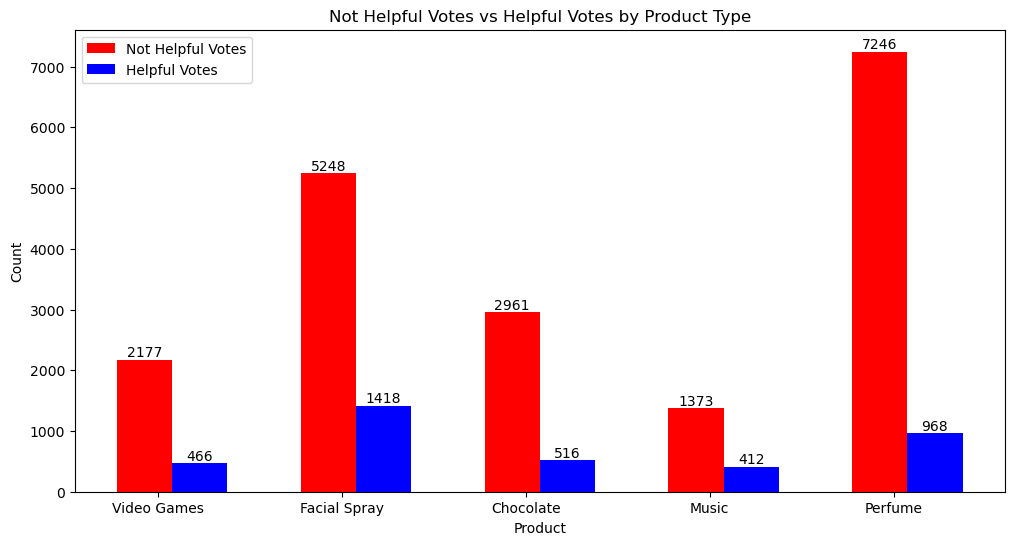

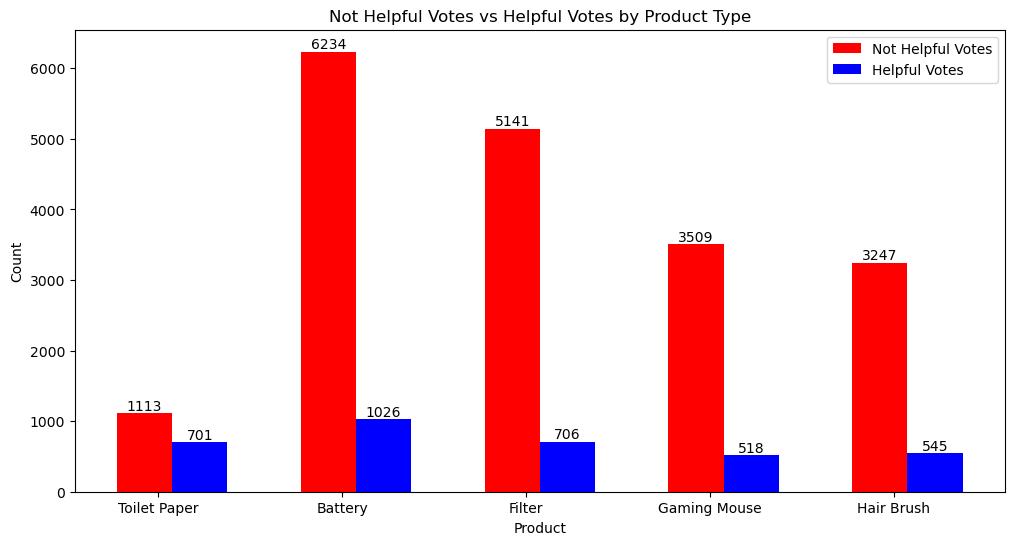

In [73]:
plot_votes_by_product_type (data_hedonic)
plot_votes_by_product_type (data_utilitarian)

In [63]:
# Calculate review counts by product type for the hedonic dataset
calculate_review_counts(data_hedonic, category_column='product')

        Product  Not Helpful Votes  Helpful Votes  Total Reviews  \
0   Video Games               2177            466           2643   
1  Facial Spray               5248           1418           6666   
2     Chocolate               2961            516           3477   
3         Music               1373            412           1785   
4       Perfume               7246            968           8214   

   Helpful Votes Percentage  
0                 17.631479  
1                 21.272127  
2                 14.840380  
3                 23.081232  
4                 11.784758  


In [70]:
# Calculate review counts by product category for the hedonic dataset
calculate_review_counts(data_hedonic, category_column='main_category')

  Main_category  Not Helpful Votes  Helpful Votes  Total Reviews  \
0   Video Games               2177            466           2643   
1        Beauty              12494           2386          14880   
2       Grocery               2961            516           3477   
3         Music               1373            412           1785   

   Helpful Votes Percentage  
0                 17.631479  
1                 16.034946  
2                 14.840380  
3                 23.081232  


### For Utilitarian Products

In [52]:
# Calculate review counts by product type for the utilitarian dataset
calculate_review_counts(data_utilitarian, category_column='product')


        Product  Not Helpful Votes  Helpful Votes  Total Reviews  \
0  Toilet Paper               1113            701           1814   
1       Battery               6234           1026           7260   
2        Filter               5141            706           5847   
3  Gaming Mouse               3509            518           4027   
4    Hair Brush               3247            545           3792   

   Helpful Votes Percentage  
0                 38.643881  
1                 14.132231  
2                 12.074568  
3                 12.863174  
4                 14.372363  


In [68]:
# Calculate by Main Category for Date
calculate_review_counts(data_utilitarian, category_column='main_category')

  Main_category  Not Helpful Votes  Helpful Votes  Total Reviews  \
0       Grocery               1113            701           1814   
1   Electronics               9743           1544          11287   
2    Appliances               5141            706           5847   
3        Beauty               3247            545           3792   

   Helpful Votes Percentage  
0                 38.643881  
1                 13.679454  
2                 12.074568  
3                 14.372363  
